In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import fits
import pandas as pd
from astropy.table import Table, vstack

In [2]:
# Open the FITS file
hdul = fits.open('2.fits')

In [3]:
# Print the information about the FITS file
hdul.info()

Filename: 2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (128,)   float32   


In [10]:
hdul[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                  128 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2024-03-04T20:24:23' / Date FITS file was generated                  
IRAF-TLM= '2024-03-04T20:24:43' / Time of last modification                     
DC-FLAG =                    0                                                  
CRPIX1  =                   1.                                                  
CRVAL1  =             4549.542                                                  
CDELT1  =                 1.01                                                  
                            

In [6]:
# Access the data in the FITS file
data = hdul[0].data
data

array([1.05531  , 1.008863 , 0.9803847, 0.9416253, 1.009446 , 1.012613 ,
       0.9624636, 1.048018 , 1.084912 , 1.184266 , 1.294235 , 1.268503 ,
       1.207742 , 1.283824 , 1.174633 , 1.165669 , 1.278324 , 1.172818 ,
       1.317876 , 1.357451 , 1.355483 , 1.329389 , 1.386015 , 1.365943 ,
       1.246288 , 1.201353 , 1.093075 , 1.031082 , 1.04251  , 1.078048 ,
       1.000272 , 1.016688 , 0.9664252, 0.9929623, 1.023515 , 1.033573 ,
       0.9608428, 1.058628 , 1.028761 , 0.9772385, 0.8961799, 0.9887936,
       1.013196 , 1.025025 , 1.024989 , 0.9969849, 0.9809564, 0.9970676,
       1.002175 , 0.9893372, 0.9831223, 1.058776 , 0.9246713, 0.9912577,
       0.9389823, 1.011352 , 0.9706704, 0.9969348, 1.00887  , 1.028595 ,
       1.007187 , 1.074515 , 0.926915 , 1.055343 , 1.044788 , 1.08214  ,
       1.00127  , 1.058662 , 1.09204  , 1.077519 , 1.055707 , 0.979379 ,
       1.039523 , 1.069289 , 1.055566 , 1.049351 , 1.020795 , 1.043316 ,
       1.029501 , 1.195571 , 1.504692 , 1.576521 , 

In [16]:
nx, wav0, i0 = [hdul[0].header[k] for k in ("NAXIS1", "CRVAL1", "CRPIX1")]
wavelengths = wav0 + (np.arange(nx) - (i0 - 1)) 
wavelengths       

array([4549.542, 4550.542, 4551.542, 4552.542, 4553.542, 4554.542,
       4555.542, 4556.542, 4557.542, 4558.542, 4559.542, 4560.542,
       4561.542, 4562.542, 4563.542, 4564.542, 4565.542, 4566.542,
       4567.542, 4568.542, 4569.542, 4570.542, 4571.542, 4572.542,
       4573.542, 4574.542, 4575.542, 4576.542, 4577.542, 4578.542,
       4579.542, 4580.542, 4581.542, 4582.542, 4583.542, 4584.542,
       4585.542, 4586.542, 4587.542, 4588.542, 4589.542, 4590.542,
       4591.542, 4592.542, 4593.542, 4594.542, 4595.542, 4596.542,
       4597.542, 4598.542, 4599.542, 4600.542, 4601.542, 4602.542,
       4603.542, 4604.542, 4605.542, 4606.542, 4607.542, 4608.542,
       4609.542, 4610.542, 4611.542, 4612.542, 4613.542, 4614.542,
       4615.542, 4616.542, 4617.542, 4618.542, 4619.542, 4620.542,
       4621.542, 4622.542, 4623.542, 4624.542, 4625.542, 4626.542,
       4627.542, 4628.542, 4629.542, 4630.542, 4631.542, 4632.542,
       4633.542, 4634.542, 4635.542, 4636.542, 4637.542, 4638.

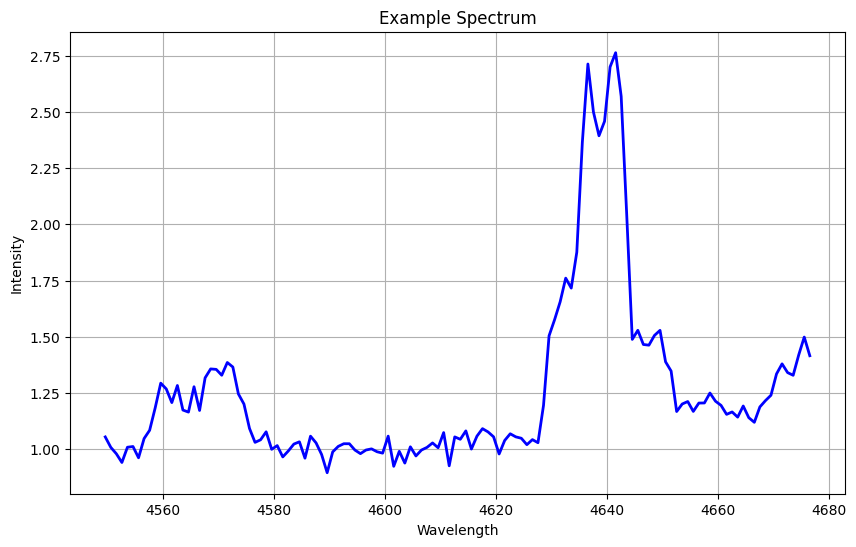

In [18]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, data, color='blue', linewidth=2)
plt.title('Example Spectrum')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()

# Other way

In [23]:
# Calculate wavelengths
pixel_indices = np.arange(1, hdul[0].header["NAXIS1"] + 1)  # Pixel indices from 1 to NAXIS1
wavelengths1 = hdul[0].header["CRVAL1"] + hdul[0].header["CDELT1"] * (pixel_indices - hdul[0].header["CRPIX1"])
wavelengths1

array([4549.542, 4550.552, 4551.562, 4552.572, 4553.582, 4554.592,
       4555.602, 4556.612, 4557.622, 4558.632, 4559.642, 4560.652,
       4561.662, 4562.672, 4563.682, 4564.692, 4565.702, 4566.712,
       4567.722, 4568.732, 4569.742, 4570.752, 4571.762, 4572.772,
       4573.782, 4574.792, 4575.802, 4576.812, 4577.822, 4578.832,
       4579.842, 4580.852, 4581.862, 4582.872, 4583.882, 4584.892,
       4585.902, 4586.912, 4587.922, 4588.932, 4589.942, 4590.952,
       4591.962, 4592.972, 4593.982, 4594.992, 4596.002, 4597.012,
       4598.022, 4599.032, 4600.042, 4601.052, 4602.062, 4603.072,
       4604.082, 4605.092, 4606.102, 4607.112, 4608.122, 4609.132,
       4610.142, 4611.152, 4612.162, 4613.172, 4614.182, 4615.192,
       4616.202, 4617.212, 4618.222, 4619.232, 4620.242, 4621.252,
       4622.262, 4623.272, 4624.282, 4625.292, 4626.302, 4627.312,
       4628.322, 4629.332, 4630.342, 4631.352, 4632.362, 4633.372,
       4634.382, 4635.392, 4636.402, 4637.412, 4638.422, 4639.

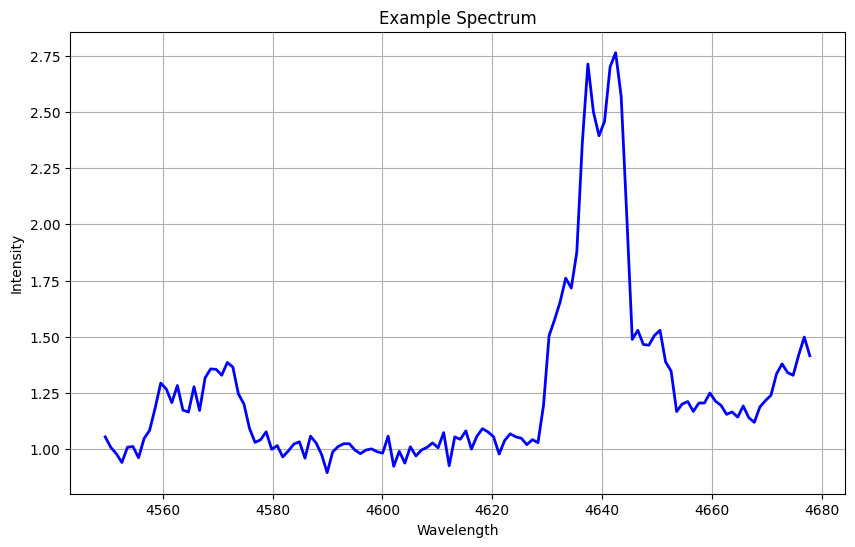

In [24]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(wavelengths1, data, color='blue', linewidth=2)
plt.title('Example Spectrum')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()